In [322]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import warnings

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [607]:
df = pd.read_csv("bus_table.csv")
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


None

,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

In [608]:
df_copy = df.copy()
df_null = df[df.isna().any(axis=1)]
df = df.dropna()
display(df_null.shape)

(240, 5)

## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку. 
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


In [609]:
df["table"] = pd.to_datetime(df["data"] + ' ' + df["scheduled"])

In [610]:
df["arrival"] = pd.to_datetime(df["data"] + ' ' + df["actual"])

In [611]:
display(df.head(3))

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

In [612]:
df = df.groupby(["route","direction"]).apply(lambda x: x.sort_values(by="table"))
df = df.drop(["route","direction"], axis =  1)
df = df.reset_index().drop("level_2",axis = 1)
df["interval"] = df.groupby(["route", "direction"])["table"].diff()
df["interval"] = df["interval"].apply(lambda x: x.total_seconds() / 60)
df["arr_interval"] = df.groupby(["route", "direction"])["arrival"].diff()
df["arr_interval"] = df["arr_interval"].apply(lambda x: x.total_seconds() / 60)
top_interval = df.groupby(["route", "direction"])["interval"].value_counts()
top_interval = pd.DataFrame(top_interval)
top_interval = top_interval.reset_index()
top_interval = top_interval.groupby(["route", "direction"]).apply(lambda x: x.nlargest(3, 'count'))
top_interval = pd.DataFrame(top_interval)
top_interval = top_interval.drop(["route","direction"], axis =  1)
display(top_interval.reset_index().drop("level_2",axis = 1).set_index(["route","direction"]))
display(df)

interval  count
route direction                 
A     north          12.0   1434
      north          15.0   1377
      north           7.0    756
      south          15.0   1453
      south          12.0   1312
      south           8.0    710
B     north          15.0   1507
      north          12.0   1413
      north           8.0   1141
      south          15.0   1391
      south          12.0   1300
      south           8.0   1159
C     north          10.0   1869
      north          15.0    590
      north           6.0    552
      south          10.0   1342
      south          12.0   1087
      south          15.0   1049

,route,direction,data,scheduled,actual,table,arrival,interval,arr_interval
0,A,north,2016-03-26,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN
1,A,north,2016-03-26,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000
2,A,north,2016-03-26,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333
3,A,north,2016-03-26,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667
4,A,north,2016-03-26,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000
...,...,...,...,...,...,...,...,...,...
38912,C,south,2016-05-27,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00,15.550000
38913,C,south,2016-05-27,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00,9.766667
38914,C,south,2016-05-27,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00,16.916667
38915,C,south,2016-05-27,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00,24.333333


## Задание 5
Найдите время в минутах для опоздания авдобуса (+ задержка, - раньше расписания)

In [621]:
df["difference"] = pd.to_datetime(df["actual"],format = '%H:%M:%S') - pd.to_datetime(df["scheduled"],format = '%H:%M:%S')
df["difference"] = df["difference"].apply(lambda x: x.total_seconds() / 60)
df.loc[df["difference"] < -1000, "arrival"] += timedelta(days=1)
df.loc[df["difference"] > 1000, "arrival"] -= timedelta(days=1)
df.loc[df["difference"] < -1000, "difference"] += 1440
df.loc[df["difference"] > 1000, "difference"] -= 1440
display(df.head(5))

,route,direction,data,scheduled,actual,table,arrival,interval,arr_interval,difference
0,A,north,2016-03-26,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN,4.600000
1,A,north,2016-03-26,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000,-0.100000
2,A,north,2016-03-26,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333,4.833333
3,A,north,2016-03-26,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667,8.750000
4,A,north,2016-03-26,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000,-0.650000


## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

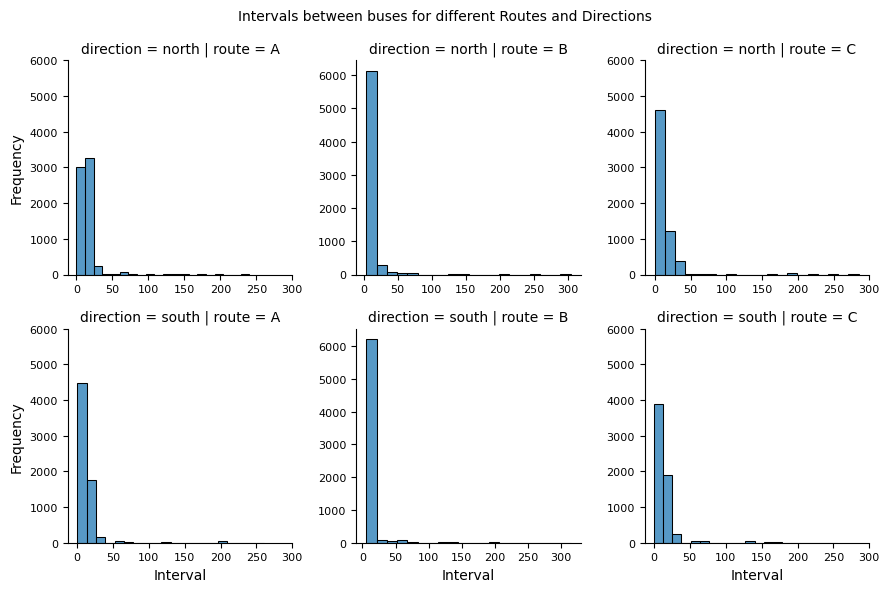

In [616]:
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated", category=FutureWarning)
g = sns.FacetGrid(df, col = 'route', row = 'direction',sharex=False,sharey=False)
g.map(sns.histplot, 'interval', bins = 20);
g.fig.suptitle('Intervals between buses for different Routes and Directions',fontsize=10)
g.set_xlabels('Interval')
g.set_ylabels('Frequency')
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xticks(range(0, 350, 50)) 
    ax.set_yticks(range(0, 7000, 1000)) 
plt.tight_layout()
plt.show()

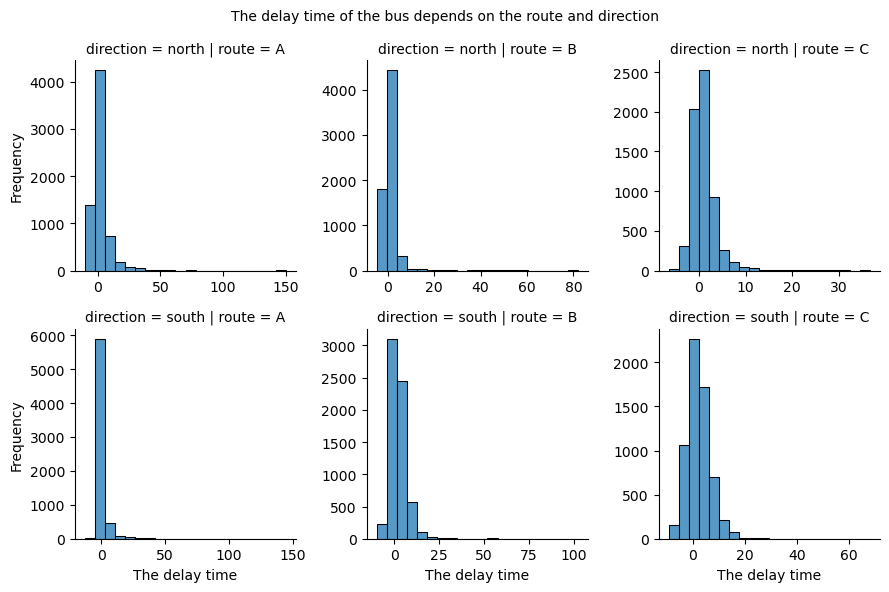

In [620]:
q = sns.FacetGrid(df, col = 'route', row = 'direction',sharex=False,sharey=False)
q.map(sns.histplot, 'difference', bins = 20);
q.fig.suptitle('The delay time of the bus depends on the route and direction',fontsize=10)
q.set_xlabels('The delay time')
q.set_ylabels('Frequency')    
plt.tight_layout()
plt.show()

#### Можно, что либо сказать о маршрутах автобусов содержательно?

*В северном направлении чаще встречаются большие интервалы между автобусами, такие как: 150,200,250 минут...На маршруте С автобусы не опаздывают больше, чем на час. На маршруте B могут опоздать сильнее: до 1,5 часа. А на маршруте A самые непунктуальные водители. Опоздания зафиксированы почти аж на 2.5 часа!*

## Задание финальное ... для тех кто может
Давайте попробуем заполнить пропущенные данные в расписании  - `df_null`. Как это сделать правильно?

In [632]:
warnings.filterwarnings("ignore", message="DataFrame.interpolate with object dtype is deprecated.*", category=FutureWarning)
df_copy["scheduled"] = pd.to_datetime(df["data"] + ' '+ df["scheduled"])
df_copy = df_copy.interpolate(method='linear', axis=0)
df_null = df_copy.iloc[df_null.index]
df_null.loc[:,"scheduled"] = df_null.loc[:,"scheduled"].dt.time
df_null

,data,route,direction,scheduled,actual
383,2016-04-01,A,south,19:45:25,16:00:57
471,2016-03-31,A,south,15:42:31,15:28:05
588,2016-03-30,A,south,16:05:33,14:52:36
599,2016-03-30,A,south,17:22:33,15:12:06
685,2016-03-29,A,south,12:57:28,17:56:29
...,...,...,...,...,...
37327,2016-05-10,B,north,07:38:59,15:25:47
37328,2016-05-10,B,north,07:43:59,17:44:05
37570,2016-05-12,B,north,15:47:59,18:27:55
37670,2016-05-13,B,north,22:52:59,19:04:25
